# 한글 설치

In [1]:
# 한글 설치 --> 실행하고 런타임 다시시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120500 files and direc

# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns

# 🎯to-do
1. 업종별, 요일별 매출 금액 및 비율
2. 업종별 성별 매출 비율(ex. 남 xx% 여 yy%)
3. 업종별 시간당 매출
4. 업종별 해당 지역의 동종업좀 점포 수 및 전분기 대비 증/감
5. 업종별 동종업종의 매출 규모
6. 업종별 매출 건수
7. 다른 행정동의 평균 데이터와 해당 지역 데이터 비교
8. 업종별 해당 지역의 개업률 / 폐업률
9. 업종별 연령별 매출
10. 해당 행정동의 잘 나가는 업종별 상관관계 분석하기


# 데이터 로드

In [2]:
## 데이터 로드
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/0710_Seoul_2022.csv', encoding='cp949')
df.head(2)

,기준_년_코드,기준_분기_코드,상권_코드,자치구,행정동,업종명,대분류,중분류,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,2022,4,1001494,종로구,종로1.2.3.4가동,전자상거래업,소매,유통,169,169,0,0,0,0,0,2.782508e+09,53515,59,41,8,2,7,22,19,25,16,0,2,31,40,26,1,59,41,1,30,17,31,14,6,1.641322e+09,1.141186e+09,2.303677e+08,6.284567e+07,1.920791e+08,6.156298e+08,5.403996e+08,691716231.0,449470060.0,0.0,5.772131e+07,8.722558e+08,1.121641e+09,712362747.0,18527562,1.635059e+09,1.132196e+09,35053457,833689921,474889969.0,8.577005e+08,3.950812e+08,1.708396e+08,22946,30569,2985,1612,2942,6248,9159,18265,12304,0,614,14153,23068,15277,403,24876,28546,1010,21130,9712,9262,7935,4373
1,2022,4,1001494,종로구,종로1.2.3.4가동,조명용품,소매,가구/인테리어,581,582,0,1,1,6,1,2.406300e+10,85386,99,1,16,19,29,20,15,1,0,0,22,32,44,2,0,78,22,0,1,1,44,35,20,2.377983e+10,2.831665e+08,3.890610e+09,4.463358e+09,6.994073e+09,4.718932e+09,3.712860e+09,242260332.0,40906125.0,0.0,5.281858e+09,7.655191e+09,1.056854e+10,557407490.0,0,1.443890e+10,4.024867e+09,1099948,118672283,226742566.0,8.051040e+09,6.393670e+09,3.672538e+09,82299,3087,15983,15382,18795,16018,16121,2254,833,0,14754,28413,37974,4245,0,48718,9576,186,1583,2694,16070,19674,18088


# 신촌동


In [3]:
# 자치구 데이터프레임 생성
jongno = df[df['자치구'] == '서대문구']

# 행정동 데이터프레임 생성
sinchon = jongno[jongno['행정동'] == '신촌동']
print(f'데이터프레임 행열: sinchon.shape')

print('-'*80)

sinchon.reset_index(drop=True, inplace=True)
sinchon.head(2)

데이터프레임 행열: sinchon.shape
--------------------------------------------------------------------------------


,기준_년_코드,기준_분기_코드,상권_코드,자치구,행정동,업종명,대분류,중분류,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,2022,4,2130179,서대문구,신촌동,화초,소매,생활용품,11,11,0,0,0,0,0,277763661.0,6757,78,22,13,13,14,22,17,16,6,0,14,28,38,19,0,22,79,2,36,12,16,27,8,215570444.0,62193217.0,35237925.0,35270745.0,37458431.0,61676582.0,45926761.0,45349332.0,16843885.0,0.0,39825639.0,78435640.0,106267017.0,52675147.0,560218,39025329.0,142536205.0,3074196,65201442,22558134.0,28187898.0,48425875.0,14113990.0,5285,1472,752,998,1112,1142,1281,1087,385,0,810,2059,2121,1755,12,1027,4830,211,3032,715,670,974,257
1,2022,4,2130179,서대문구,신촌동,화장품,소매,생활용품,28,36,3,1,3,1,8,681975161.0,5258,94,6,10,28,14,13,30,5,1,0,1,26,37,37,0,15,85,0,6,22,14,15,44,639773143.0,42202018.0,64574561.0,191174921.0,95605581.0,87550246.0,200867834.0,34965833.0,7236185.0,0.0,7020180.0,174539933.0,251021686.0,249393362.0,0,97897170.0,559942283.0,0,36536202,145742545.0,92217895.0,97010761.0,286332050.0,4733,525,494,1006,912,944,1377,309,216,0,108,1532,1484,2134,0,959,3912,0,465,696,942,1516,1252


### /1/ 업종별, 요일별 매출 금액 및 비율

#### 업종수_대분류_상점수+매출 대조

===========================================대분류 상점수, 매출금액============================================


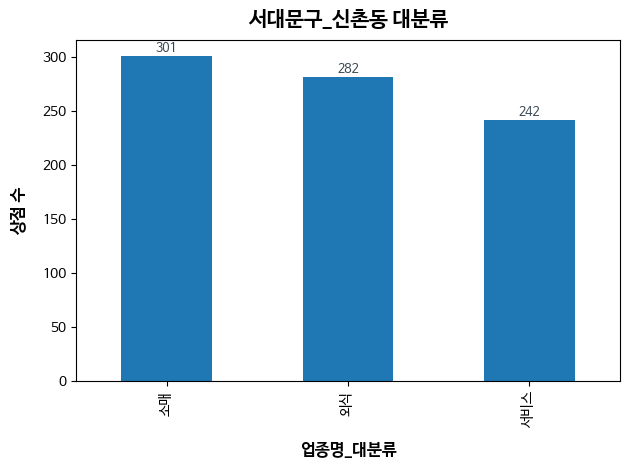

--------------------------------------------------------------------------------


<ipython-input-19-f2108a1d6cbb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']


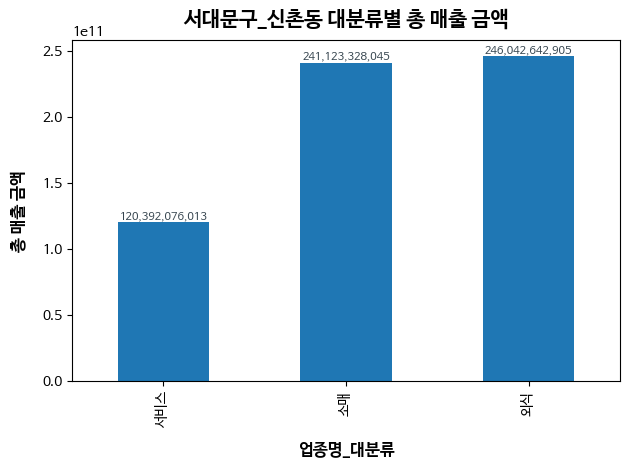

-------------------------------------------대분류 상점수&매출 비율--------------------------------------------


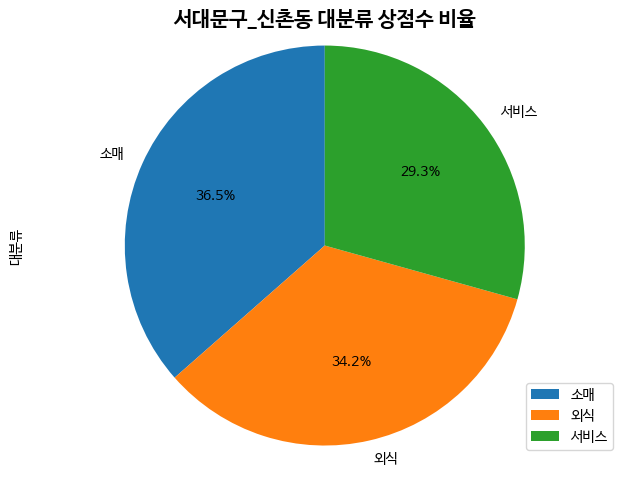

--------------------------------------------대분류 상점수 파이차트--------------------------------------------


<ipython-input-19-f2108a1d6cbb>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']


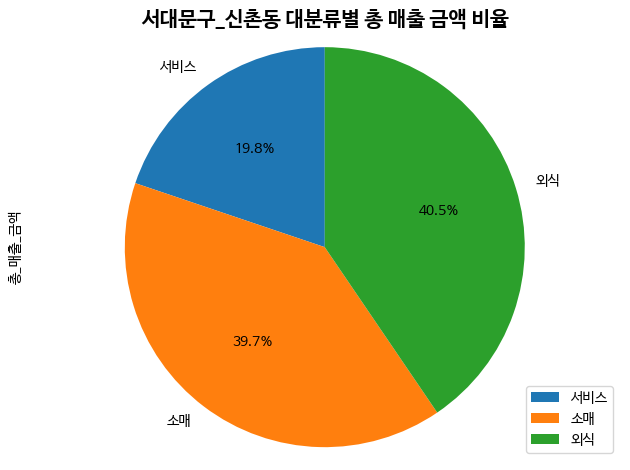

==============================================소매 상점 수===============================================


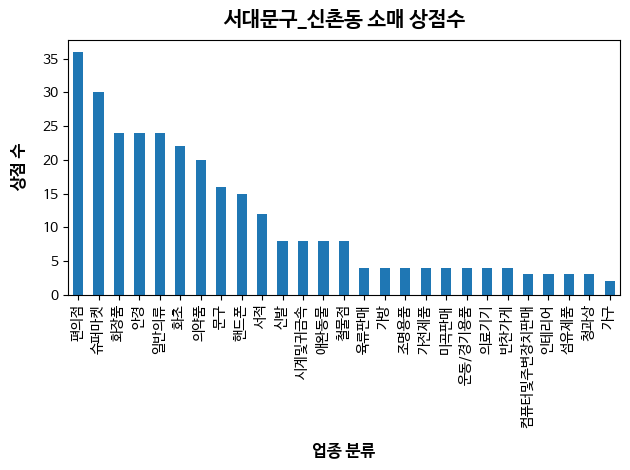

----------------------------------------------소매 매출 건수----------------------------------------------


<ipython-input-19-f2108a1d6cbb>:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']


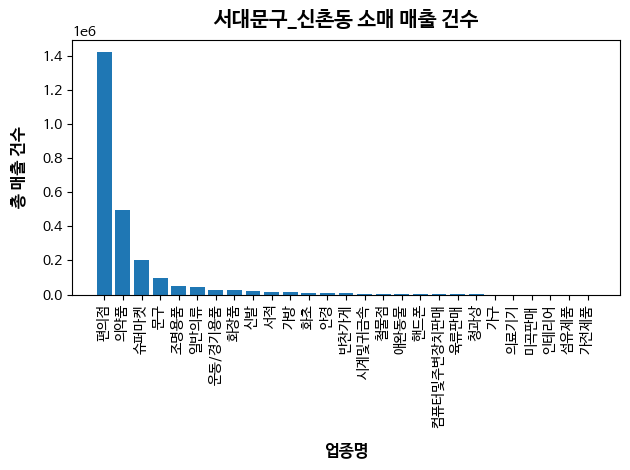

----------------------------------------------소매 매출 금액----------------------------------------------


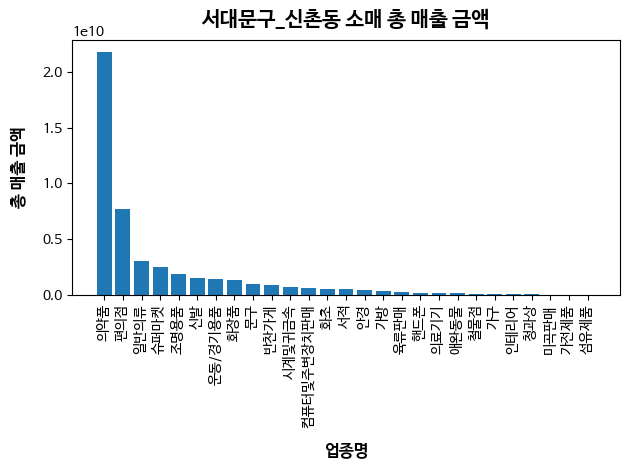

===============================================외식 상점수===============================================


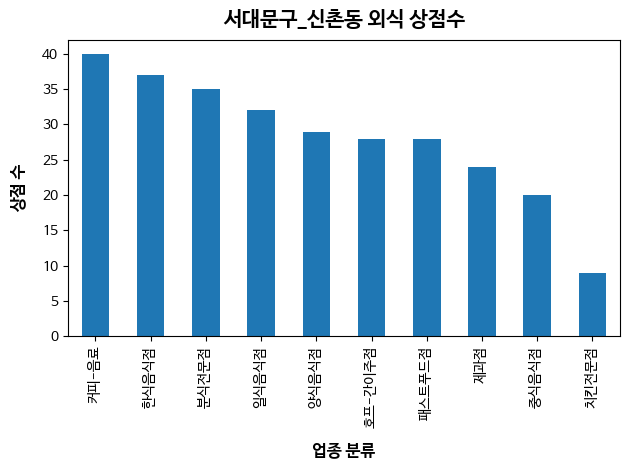

----------------------------------------------외식 매출 건수----------------------------------------------


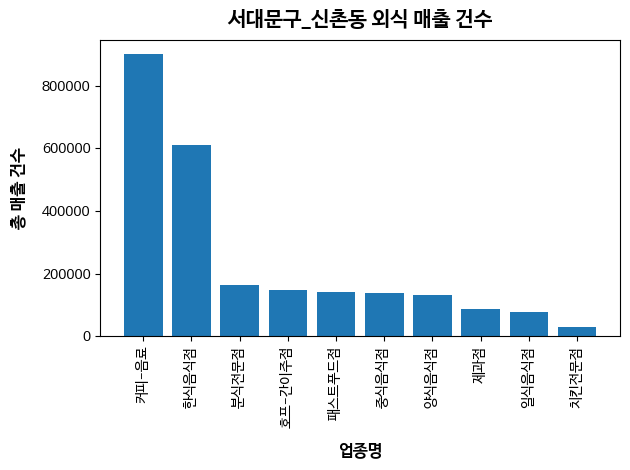

----------------------------------------------외식 매출금액-----------------------------------------------


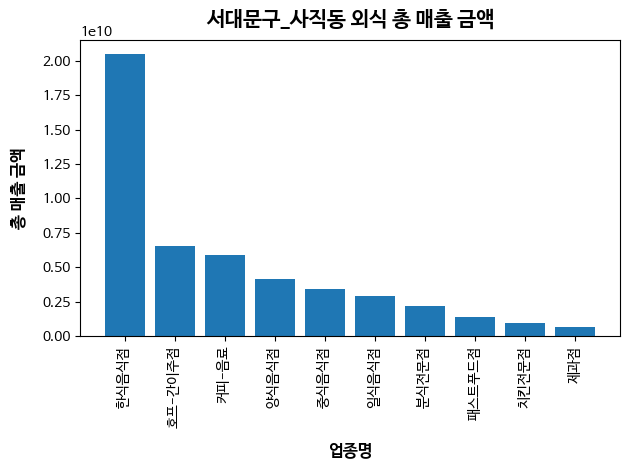

==============================================서비스 상점수===============================================


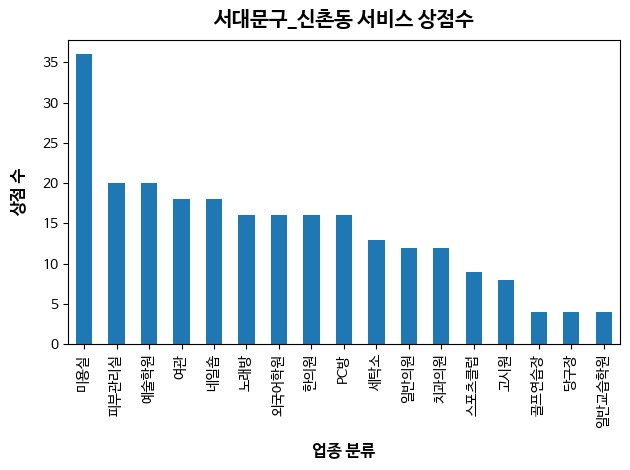

---------------------------------------------서비스 매출 건수----------------------------------------------


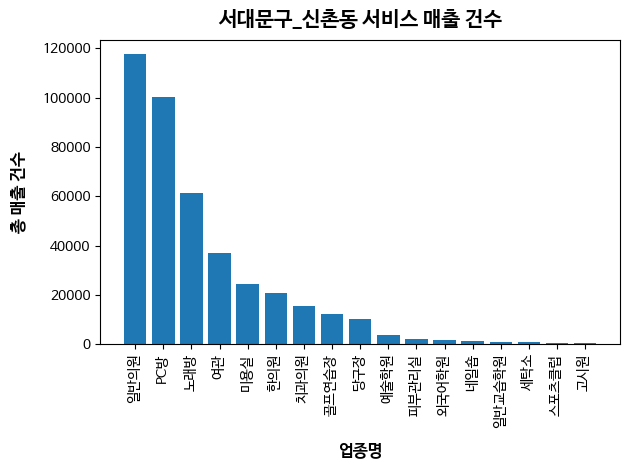

-----------------------------------------------서비스 매출-----------------------------------------------


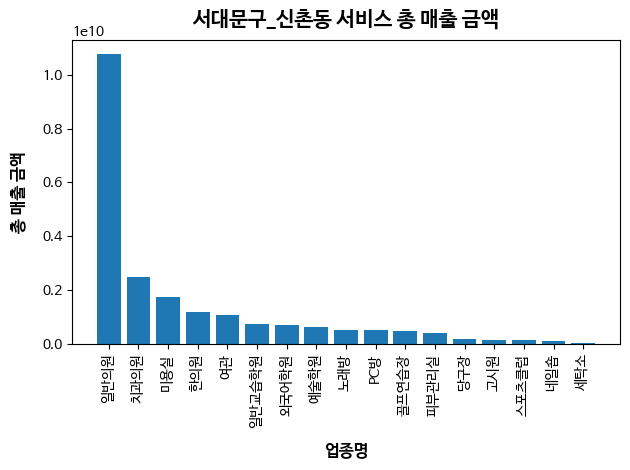

In [19]:
print("{0:=^100}".format("대분류 상점수, 매출금액"))

# '대분류' 컬럼 값 개수 계산
category_counts = sinchon['대분류'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
category_counts.plot(kind='bar')

# 숫자 값 표시
for i, v in enumerate(category_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명_대분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 대분류', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print('-'*80)




# '총_매출_금액' 컬럼 생성
sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']

# '대분류' 컬럼 값에 따른 '총_매출_금액' 합산
total_sales_by_category = sinchon.groupby('대분류')['총_매출_금액'].sum()

# 그래프 그리기
fig, ax = plt.subplots()
total_sales_by_category.plot(kind='bar')

# 숫자 값 표시
for i, v in enumerate(total_sales_by_category):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명_대분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 대분류별 총 매출 금액', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:-^100}".format("대분류 상점수&매출 비율"))




# 그래프 그리기
fig, ax = plt.subplots()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# 원형 차트에 대한 설정
ax.axis('equal')

# 범례 추가
ax.legend(labels=category_counts.index, loc='lower right')

# 제목 설정
ax.set_title('서대문구_신촌동 대분류 상점수 비율', fontsize=15, fontweight='bold')

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:-^100}".format("대분류 상점수 파이차트"))




# '총_매출_금액' 컬럼 생성
sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']

# '대분류' 컬럼 값에 따른 '총_매출_금액' 합산
total_sales_by_category = sinchon.groupby('대분류')['총_매출_금액'].sum()

# 그래프 그리기
fig, ax = plt.subplots()
total_sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# 원형 차트
ax.axis('equal')

# 범례 추가
ax.legend(labels=total_sales_by_category.index, loc='lower right')

# 제목 설정
ax.set_title('서대문구_신촌동 대분류별 총 매출 금액 비율', fontsize=15, fontweight='bold')

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("소매 상점 수"))




# '대분류' 컬럼 값이 '소매'인 데이터 추출
sinchon_retail = sinchon[sinchon['대분류'] == '소매']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
service_counts = sinchon_retail['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
service_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종 분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 소매 상점수', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()



print("{0:-^100}".format("소매 매출 건수"))

# '총_매출_금액' 컬럼 생성
sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']

# '대분류' 컬럼 값이 '소매'인 데이터 추출
sinchon_retail_counts = sinchon[sinchon['대분류'] == '소매']

# '총_매출_건수'을 기준으로 내림차순 정렬
sinchon_retail_counts = sinchon_retail_counts.sort_values('총_매출_건수', ascending=False)

# '총_매출_건수'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_retail_counts['업종명'], sinchon_retail_counts['총_매출_건수'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 소매 매출 건수', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()



print("{0:-^100}".format("소매 매출 금액"))




# '대분류' 컬럼 값이 '소매'인 데이터 추출
sinchon_retail_sales = sinchon[sinchon['대분류'] == '소매']

# '총_매출_금액'을 기준으로 내림차순 정렬
sinchon_retail_sales = sinchon_retail_sales.sort_values('총_매출_금액', ascending=False)

# '총_매출_금액'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_retail_sales['업종명'], sinchon_retail_sales['총_매출_금액'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 소매 총 매출 금액', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()





print("{0:=^100}".format("외식 상점수"))




# '대분류' 컬럼 값이 '외식'인 데이터 추출
sinchon_service = sinchon[sinchon['대분류'] == '외식']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
service_counts = sinchon_service['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
service_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종 분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 외식 상점수', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:-^100}".format("외식 매출 건수"))



# '대분류' 컬럼 값이 '외식'인 데이터 추출
sinchon_retail_counts = sinchon[sinchon['대분류'] == '외식']

# '총_매출_건수'을 기준으로 내림차순 정렬
sinchon_retail_counts = sinchon_retail_counts.sort_values('총_매출_건수', ascending=False)

# '총_매출_건수'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_retail_counts['업종명'], sinchon_retail_counts['총_매출_건수'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 외식 매출 건수', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()




print("{0:-^100}".format("외식 매출금액"))




# '대분류' 컬럼 값이 '외식'인 데이터 추출
sinchon_outdoor_sales = sinchon[sinchon['대분류'] == '외식']

# '총_매출_금액'을 기준으로 내림차순 정렬
sinchon_outdoor_sales = sinchon_outdoor_sales.sort_values('총_매출_금액', ascending=False)

# '총_매출_금액'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_outdoor_sales['업종명'], sinchon_outdoor_sales['총_매출_금액'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_사직동 외식 총 매출 금액', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()



print("{0:=^100}".format("서비스 상점수"))




# '대분류' 컬럼 값이 '서비스'인 데이터 추출
sinchon_service = sinchon[sinchon['대분류'] == '서비스']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
service_counts = sinchon_service['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
service_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종 분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 서비스 상점수', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:-^100}".format("서비스 매출 건수"))



# '대분류' 컬럼 값이 '서비스'인 데이터 추출
sinchon_retail_counts = sinchon[sinchon['대분류'] == '서비스']

# '총_매출_건수'을 기준으로 내림차순 정렬
sinchon_retail_counts = sinchon_retail_counts.sort_values('총_매출_건수', ascending=False)

# '총_매출_건수'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_retail_counts['업종명'], sinchon_retail_counts['총_매출_건수'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 서비스 매출 건수', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()




print("{0:-^100}".format("서비스 매출"))




# '대분류' 컬럼 값이 '서비스'인 데이터 추출
sinchon_retail_sales = sinchon[sinchon['대분류'] == '서비스']

# '총_매출_금액'을 기준으로 내림차순 정렬
sinchon_retail_sales = sinchon_retail_sales.sort_values('총_매출_금액', ascending=False)

# '총_매출_금액'을 막대 그래프로 그리기
fig, ax = plt.subplots()
ax.bar(sinchon_retail_sales['업종명'], sinchon_retail_sales['총_매출_금액'])

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 서비스 총 매출 금액', pad=10, fontsize=15, fontweight='bold')

# 그래프 출력
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

#### 업종수_중분류_상점수

************************************************중분류*************************************************


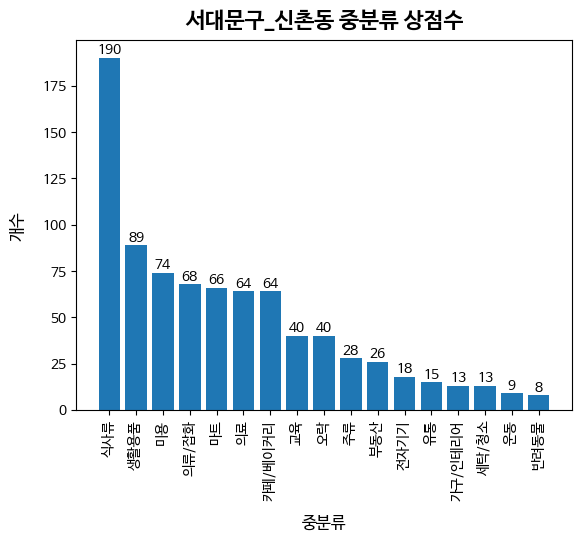

--------------------------------------------------------------------------------


<ipython-input-20-9a800e37b23c>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']


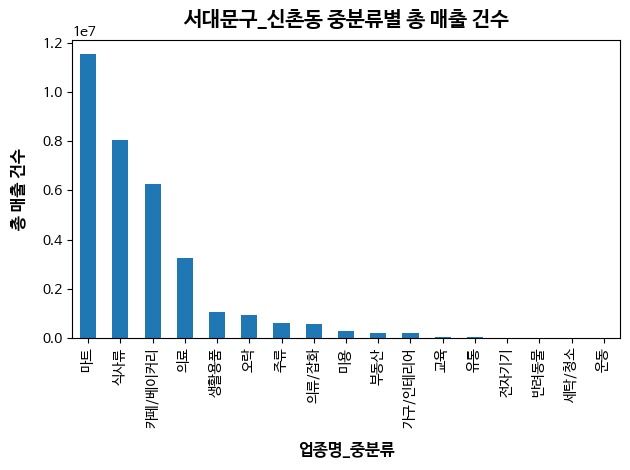

--------------------------------------------------------------------------------


<ipython-input-20-9a800e37b23c>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']


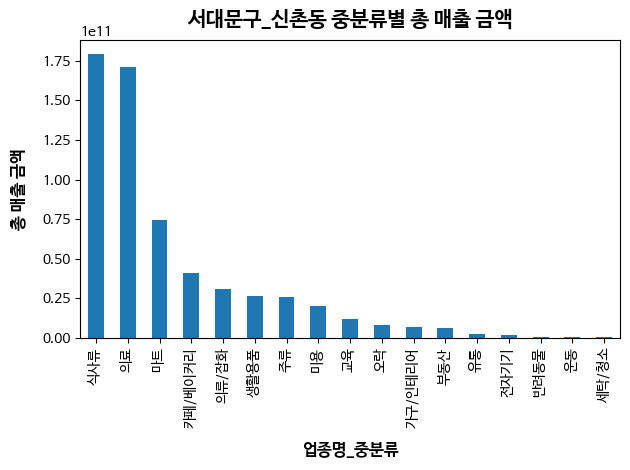

**********************************************TOP3 상세***********************************************
================================================식사류=================================================


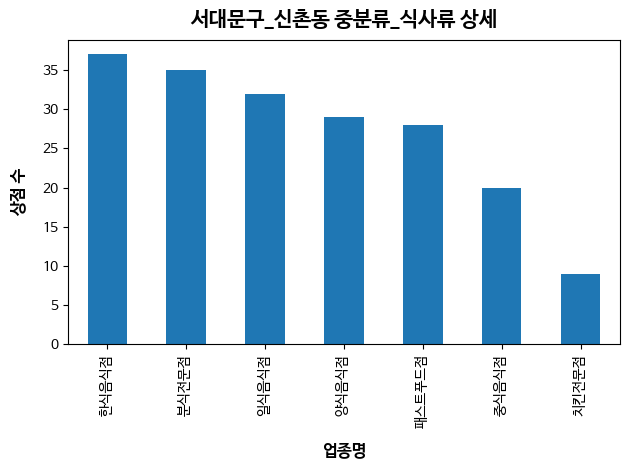

==============================================카페/베이커리===============================================


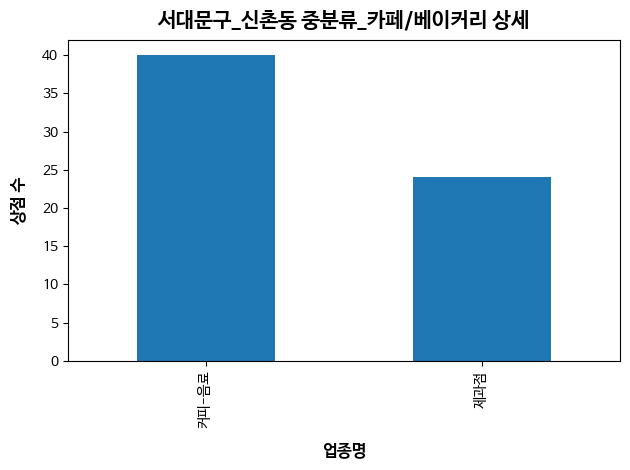

=================================================의료=================================================


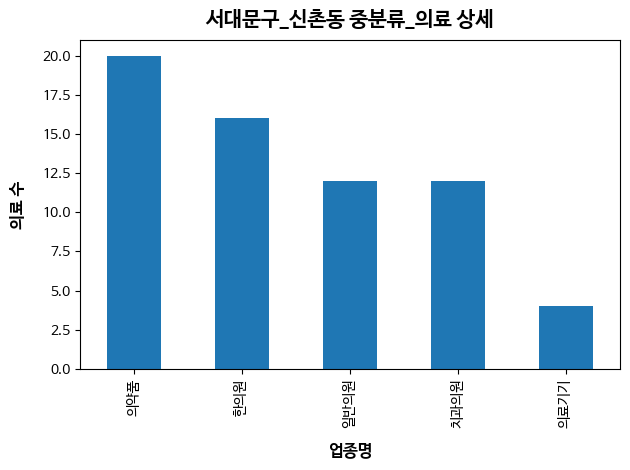

In [20]:
print("{0:*^100}".format("중분류"))

# 중분류 개수 데이터프레임 생성
sinchon_stores_counts = sinchon['중분류'].value_counts()
sinchon_stores = pd.DataFrame({'중분류': sinchon_stores_counts.index, '개수': sinchon_stores_counts.values})

x = sinchon_stores['중분류']
y = sinchon_stores['개수']

# 막대그래프 그리기
plt.bar(x, y)

# 각 막대 위에 값 표시
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title("서대문구_신촌동 중분류 상점수", pad = 10, fontsize=16, fontweight='bold')
plt.xlabel("중분류", labelpad=10, fontsize=12)
plt.ylabel("개수", labelpad=10, fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.show()



print('-'*80)




# '총_매출_건수' 컬럼 생성
sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']

# '중분류' 컬럼 값에 따른 '총_매출_금액' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('중분류')['총_매출_건수'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# 그래프 그리기
fig, ax = plt.subplots()
total_sales_by_category.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명_중분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류별 총 매출 건수', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print('-'*80)




# '총_매출_금액' 컬럼 생성
sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']

# '중분류' 컬럼 값에 따른 '총_매출_금액' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('중분류')['총_매출_금액'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# # 숫자 값 표시
# for i, v in enumerate(total_sales_by_category):
#     ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# 그래프 그리기
fig, ax = plt.subplots()
total_sales_by_category.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명_중분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류별 총 매출 금액', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()



print("{0:*^100}".format("TOP3 상세"))
print("{0:=^100}".format("식사류"))




# '중분류' 컬럼 값이 '식사류'인 데이터 추출
sinchon_meal = sinchon[sinchon['중분류'] == '식사류']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
meal_counts = sinchon_meal['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
meal_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류_식사류 상세', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("카페/베이커리"))




# '중분류' 컬럼 값이 '카페/베이커리'인 데이터 추출
sinchon_meal = sinchon[sinchon['중분류'] == '카페/베이커리']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
meal_counts = sinchon_meal['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
meal_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('상점 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류_카페/베이커리 상세', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("의료"))




# '중분류' 컬럼 값이 '의료'인 데이터 추출
sinchon_medical = sinchon[sinchon['중분류'] == '의료']

# '업종명' 컬럼 값으로 그룹화하여 개수 계산
medical_counts = sinchon_medical['업종명'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots()
medical_counts.plot(kind='bar')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('의료 수', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류_의료 상세', pad=10, fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()

#### 업종수_업종명_상점수

==============================================업종명별 상점수==============================================


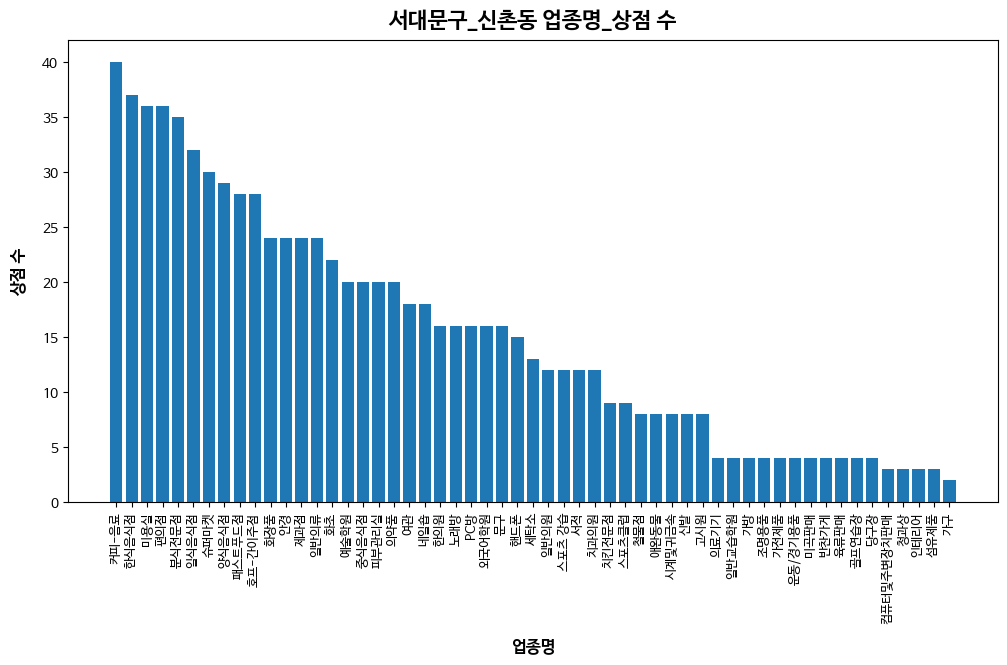

=============================================업종명별 매출건수==============================================


<ipython-input-21-55b1f0e8f0d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']


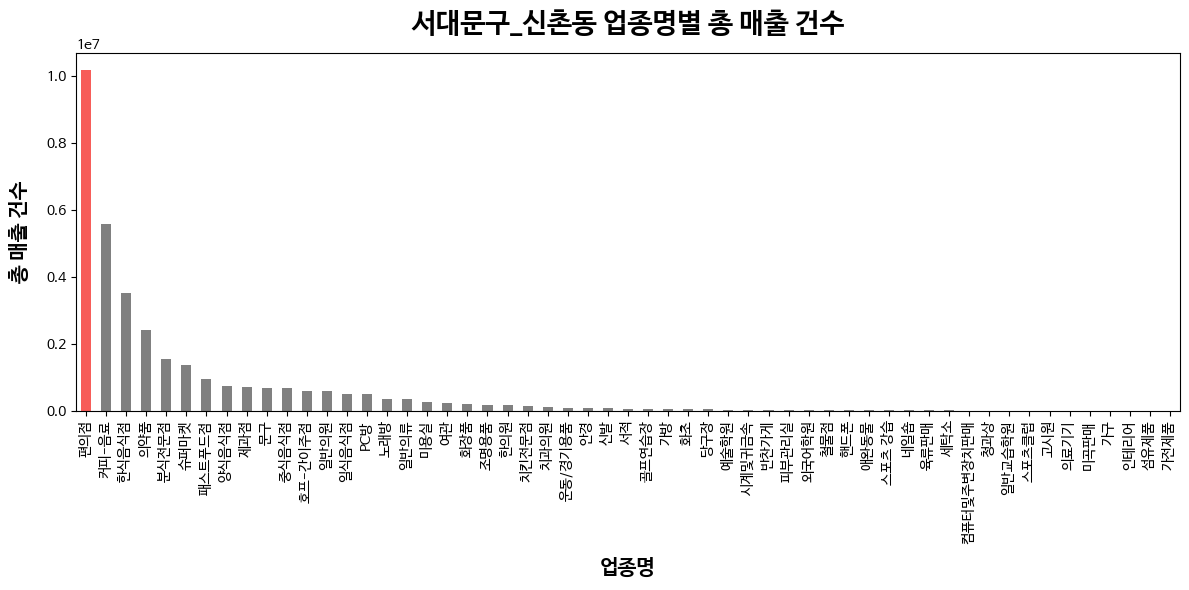

=============================================업종명별 매출금액==============================================


<ipython-input-21-55b1f0e8f0d1>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']


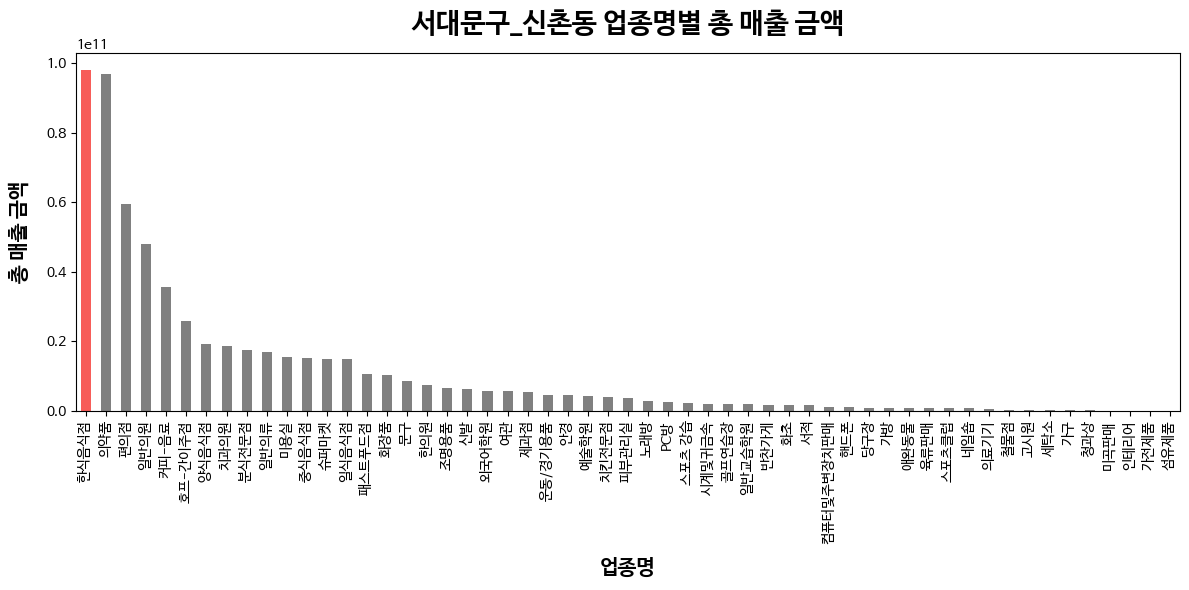

In [21]:
print("{0:=^100}".format("업종명별 상점수"))
# 업종명 개수 데이터프레임 생성
sinchon_store_types = sinchon['업종명'].value_counts()
sinchon_types = pd.DataFrame({'업종명': sinchon_store_types.index, '개수': sinchon_store_types.values})

# # 그래프 스타일 조정
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# 데이터프레임의 값 가져오기
x = sinchon_types['업종명']
y = sinchon_types['개수']

# 막대그래프 그리기
plt.bar(x, y)

# # 각 막대 위에 값 표시
# for i, v in enumerate(y):
#     plt.text(i, v, str(v), ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title("서대문구_신촌동 업종명_상점 수", pad = 10, fontsize=16, fontweight='bold')
plt.xlabel("업종명", labelpad=10, fontsize=12, fontweight='bold')
plt.ylabel("상점 수", labelpad=10, fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=10)

# 그래프 출력
plt.show()





print("{0:=^100}".format("업종명별 매출건수"))




# '총_매출_건수' 컬럼 생성
sinchon['총_매출_건수'] = sinchon['주중_매출_건수'] + sinchon['주말_매출_건수']

# '대분류' 컬럼 값에 따른 '총_매출_금액' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('업종명')['총_매출_건수'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = ['grey'] * len(total_sales_by_category)
max_index = total_sales_by_category.idxmax()
bar_colors[total_sales_by_category.index.get_loc(max_index)] = '#f75d59'

total_sales_by_category.plot(kind='bar', color=bar_colors)

# # 숫자 값 표시
# for i, v in enumerate(total_sales_by_category):
#     ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=15, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=15, fontweight='bold')
ax.set_title('서대문구_신촌동 업종명별 총 매출 건수', pad=15, fontsize=20, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("업종명별 매출금액"))




# '총_매출_금액' 컬럼 생성
sinchon['총_매출_금액'] = sinchon['주중_매출_금액'] + sinchon['주말_매출_금액']

# '대분류' 컬럼 값에 따른 '총_매출_금액' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('업종명')['총_매출_금액'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = ['grey'] * len(total_sales_by_category)
max_index = total_sales_by_category.idxmax()
bar_colors[total_sales_by_category.index.get_loc(max_index)] = '#f75d59'

total_sales_by_category.plot(kind='bar', color=bar_colors)

# # 숫자 값 표시
# for i, v in enumerate(total_sales_by_category):
#     ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종명', labelpad=10, fontsize=15, fontweight='bold')
ax.set_ylabel('총 매출 금액', labelpad=10, fontsize=15, fontweight='bold')
ax.set_title('서대문구_신촌동 업종명별 총 매출 금액', pad=15, fontsize=20, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()

#### 요일별 매출금액

<ipython-input-22-6a88cba061ce>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_days_sales = sinchon.groupby('중분류')[sinchon_sales_columns].sum().reset_index()
<ipython-input-22-6a88cba061ce>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


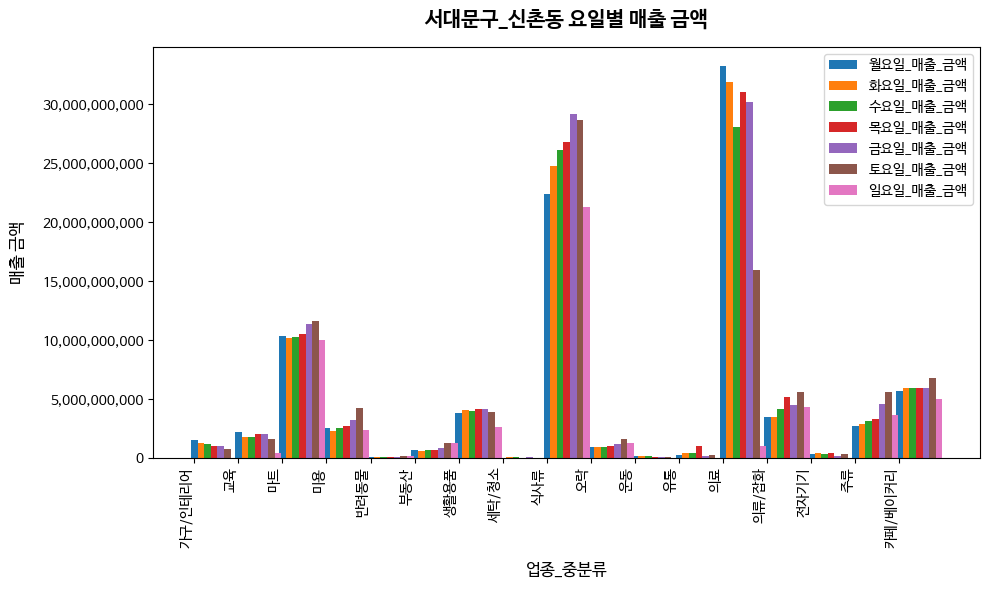

In [22]:
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_sales_columns = ['중분류', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']

sinchon_days_sales = sinchon.groupby('중분류')[sinchon_sales_columns].sum().reset_index()


# 그래프 데이터 준비
categories = sinchon_days_sales['중분류']
days = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']
values = sinchon_days_sales[days].values.T

# # 그래프 그리기, 스타일 조정
# plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(days):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_title('서대문구_신촌동 요일별 매출 금액', pad=15, fontsize=15, fontweight='bold')
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=12)
ax.set_ylabel('매출 금액', labelpad=10, fontsize=12)

# y축 표시형식 변환 - 지수표현형식 없애
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 범례 추가
ax.legend(fontsize = 10)

# 그래프 출력
plt.tight_layout()
plt.show()


### /2/ 업종별 성별 매출 비율(ex. 남 xx% 여 yy%)

In [23]:
# 필요 컬럼으로 새롭게 데이터프레임 생성1
sinchon_sex_columns = ['중분류', '남성_매출_금액', '여성_매출_금액', '남성_매출_건수', '여성_매출_건수']

sinchon_sex_sales = sinchon.groupby('중분류')[sinchon_sex_columns].sum().reset_index()


# 필요 컬럼으로 새롭게 데이터프레임 생성2
sinchon_sex_columns2 = ['업종명', '남성_매출_금액', '여성_매출_금액', '남성_매출_건수', '여성_매출_건수']

sinchon_sex_sales2 = sinchon.groupby('업종명')[sinchon_sex_columns2].sum().reset_index()

<ipython-input-23-3b10d1dabba5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_sex_sales = sinchon.groupby('중분류')[sinchon_sex_columns].sum().reset_index()
<ipython-input-23-3b10d1dabba5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_sex_sales2 = sinchon.groupby('업종명')[sinchon_sex_columns2].sum().reset_index()


#### 성별_매출금액

===========================================성별 매출 금액 카테고리1===========================================


<Figure size 1500x800 with 0 Axes>

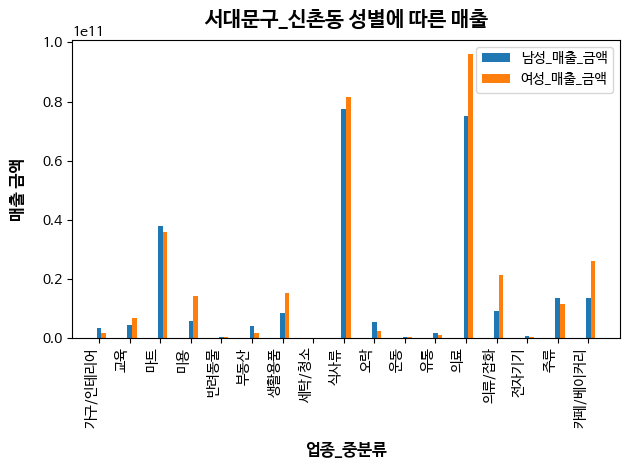

===========================================성별 매출 금액 카테고리2===========================================


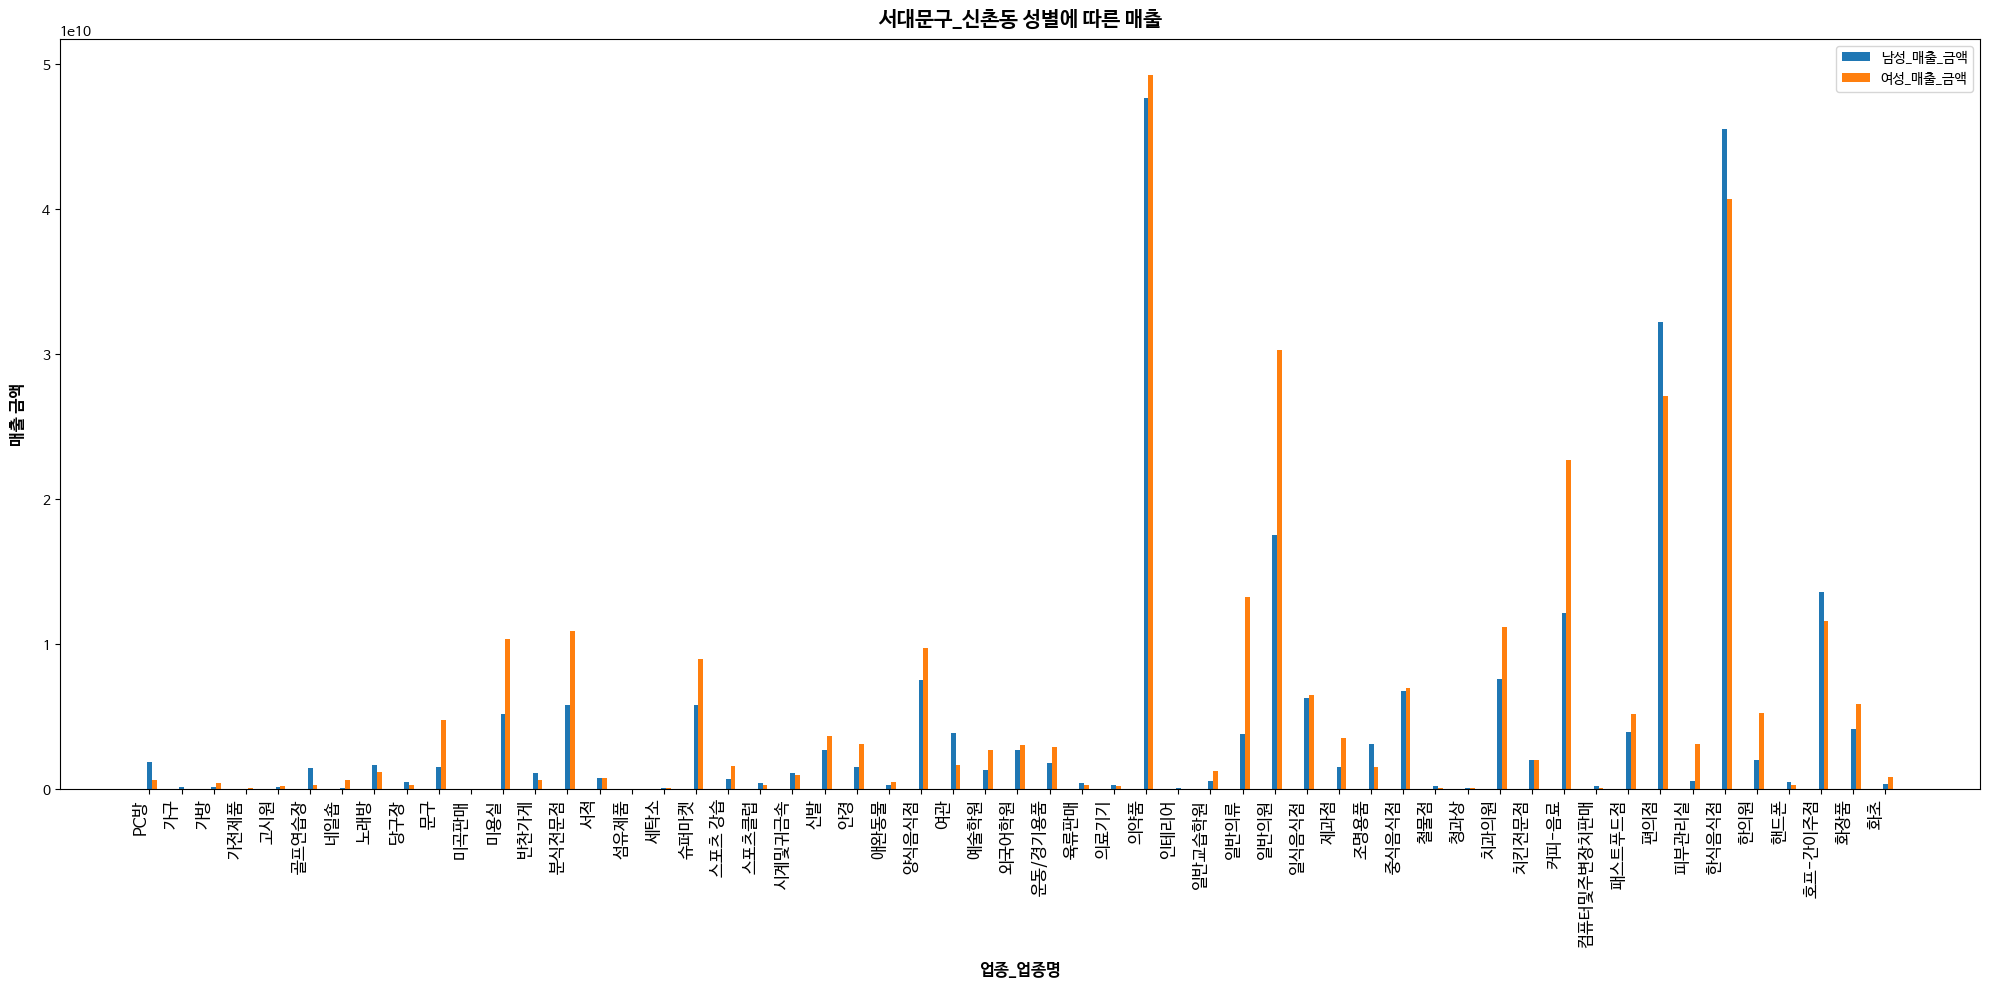

============================================성별 매출 금액 비율=============================================


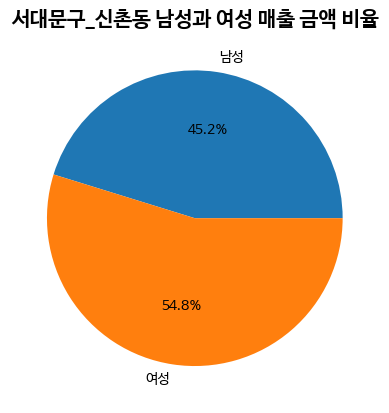

In [24]:
print("{0:=^100}".format("성별 매출 금액 카테고리1"))
# 그래프 데이터 준비
categories = sinchon_sex_sales['중분류']
sales = ['남성_매출_금액', '여성_매출_금액']
values = sinchon_sex_sales[sales].values.T

# 그래프 그리기
plt.figure(figsize=(15, 8))
fig, ax = plt.subplots()
x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(sales):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 성별에 따른 매출', fontsize=15, fontweight='bold', pad=10)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=10)

# 범례 추가
ax.legend(fontsize = 10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("성별 매출 금액 카테고리2"))


# 그래프 데이터 준비
categories = sinchon_sex_sales2['업종명']
sales = ['남성_매출_금액', '여성_매출_금액']
values = sinchon_sex_sales2[sales].values.T

# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(sales):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_업종명', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 성별에 따른 매출', fontsize=15, fontweight='bold', pad=10)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=12)

# 범례 추가
ax.legend(fontsize = 10)

# 그래프 출력
plt.tight_layout()
plt.show()





print("{0:=^100}".format("성별 매출 금액 비율"))




# 데이터 준비
labels = ['남성', '여성']
sizes = [sinchon_sex_sales['남성_매출_금액'].sum(), sinchon_sex_sales['여성_매출_금액'].sum()]

# 파이 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# 차트 제목 설정
ax.set_title('서대문구_신촌동 남성과 여성 매출 금액 비율', fontsize=15, fontweight='bold')

# 차트 출력
plt.show()

#### 성별_매출건수

===========================================성별 매출 건수 카테고리============================================


<Figure size 1500x800 with 0 Axes>

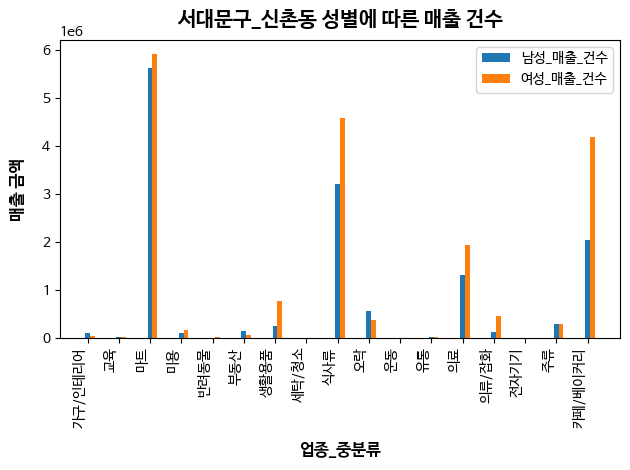

============================================성별 매출 건수 비율=============================================


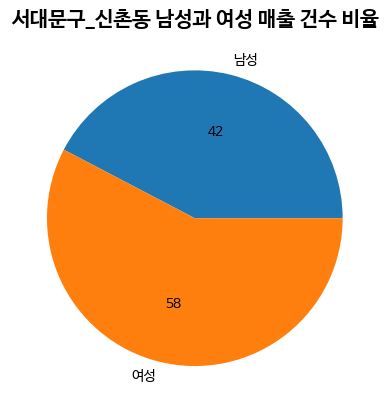

In [25]:
print("{0:=^100}".format("성별 매출 건수 카테고리"))
# 그래프 데이터 준비
categories = sinchon_sex_sales['중분류']
sales = ['남성_매출_건수', '여성_매출_건수']
values = sinchon_sex_sales[sales].values.T

# 그래프 그리기
plt.figure(figsize=(15, 8))
fig, ax = plt.subplots()
x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(sales):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 성별에 따른 매출 건수', fontsize=15, fontweight='bold', pad=10)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=10)

# 범례 추가
ax.legend(fontsize = 10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("성별 매출 건수 비율"))




# 데이터 준비
labels = ['남성', '여성']
sizes = [sinchon_sex_sales['남성_매출_건수'].sum(), sinchon_sex_sales['여성_매출_건수'].sum()]

# 파이 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f')

# 차트 제목 설정
ax.set_title('서대문구_신촌동 남성과 여성 매출 건수 비율', fontsize=15, fontweight='bold')

# 차트 출력
plt.show()

### /3/ 업종별 시간당 매출

<ipython-input-26-ffe2e65aa13e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_time_sales = sinchon.groupby('중분류')[sinchon_time_columns].sum().reset_index()


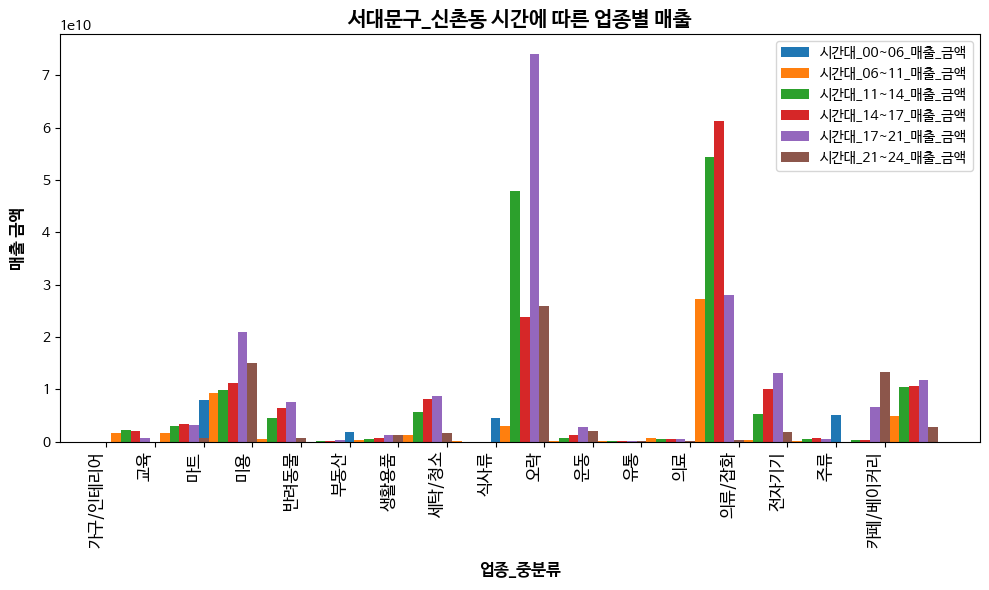

In [26]:
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_time_columns = ['중분류',
                     '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
                     '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']

sinchon_time_sales = sinchon.groupby('중분류')[sinchon_time_columns].sum().reset_index()
sinchon_time_sales


### 그래프 그리기
# 그래프 데이터 준비
categories = sinchon_time_sales['중분류']
time = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
values = sinchon_time_sales[time].values.T

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))
width = 0.2

for i, day in enumerate(time):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('매출 금액', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('서대문구_신촌동 시간에 따른 업종별 매출', fontweight='bold', fontsize=15)

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=12)

# 범례 추가
ax.legend(fontsize=10, loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()

### /4/ 업종별 해당 지역의 동종업좀 점포 수 및 전분기 대비 증/감

================================================점포수1================================================


<ipython-input-27-d1fcc5e63f11>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_stores_counts = sinchon.groupby('중분류')[sinchon_stores_columns].sum().reset_index()


<Figure size 1500x1000 with 0 Axes>

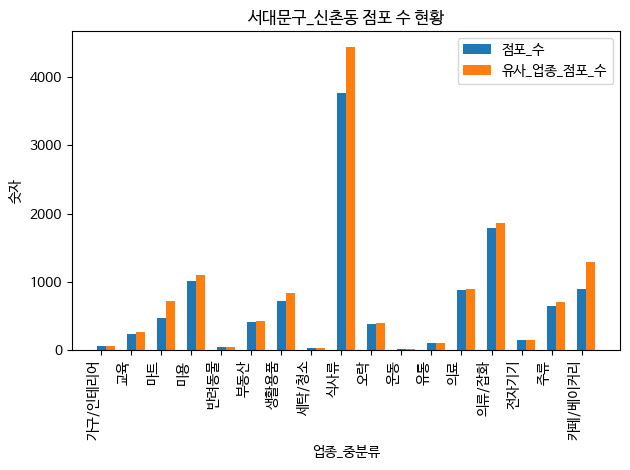

================================================점포수2================================================


<ipython-input-27-d1fcc5e63f11>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=90, ha='right')


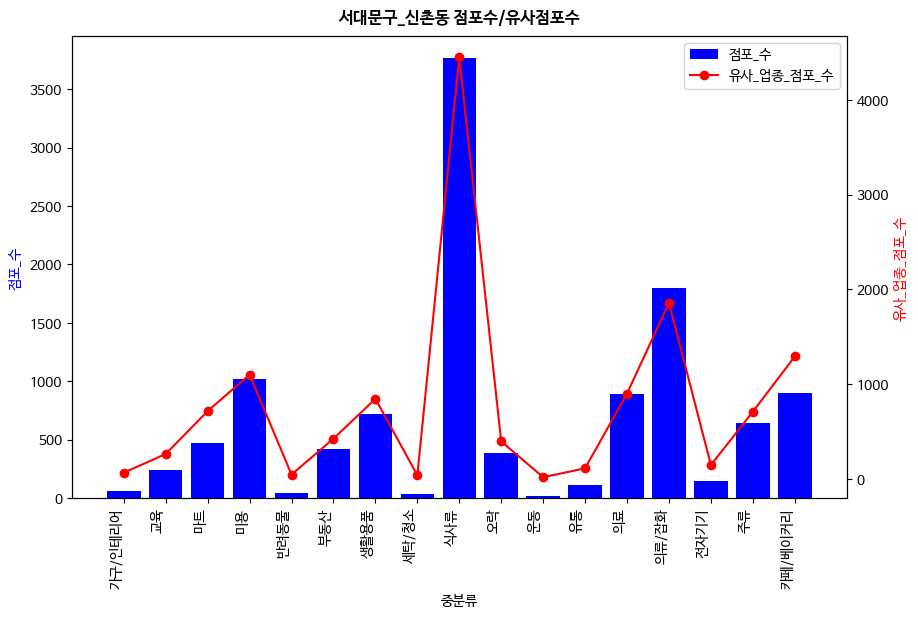

In [27]:
print("{0:=^100}".format("점포수1"))
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_stores_columns = ['중분류', '점포_수', '유사_업종_점포_수']

sinchon_stores_counts = sinchon.groupby('중분류')[sinchon_stores_columns].sum().reset_index()
sinchon_stores_counts


### 그래프 그리기
# 그래프 데이터 준비
categories = sinchon_stores_counts['중분류']
stores = ['점포_수', '유사_업종_점포_수']
values = sinchon_stores_counts[stores].values.T

# 그래프 그리기
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
x = np.arange(len(categories))
width = 0.3

for i, day in enumerate(stores):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류')
ax.set_ylabel('숫자')
ax.set_title('서대문구_신촌동 점포 수 현황')

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right')


# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("점포수2"))




# 이중 y축 그래프 --> y1=점포_수, y2=유사_업종_점포_수
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

bar = ax1.bar(sinchon_stores_counts['중분류'], sinchon_stores_counts['점포_수'], color='blue')
line, = ax2.plot(sinchon_stores_counts['중분류'], sinchon_stores_counts['유사_업종_점포_수'], marker='o', color='red')

ax1.set_title('서대문구_신촌동 점포수/유사점포수', pad=10, fontweight='bold')
ax1.set_xlabel('중분류')
ax1.set_xticklabels(categories, rotation=90, ha='right')
ax1.set_ylabel('점포_수', color='blue')
ax2.set_ylabel('유사_업종_점포_수', color='red')

plt.legend([bar, line], ['점포_수', '유사_업종_점포_수'])

plt.show()

### /6/ 업종별 매출 건수

#### 요일별

<ipython-input-28-3d5d6f08961b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_sales_counts = sinchon.groupby('중분류')[sinchon_columns].sum().reset_index()


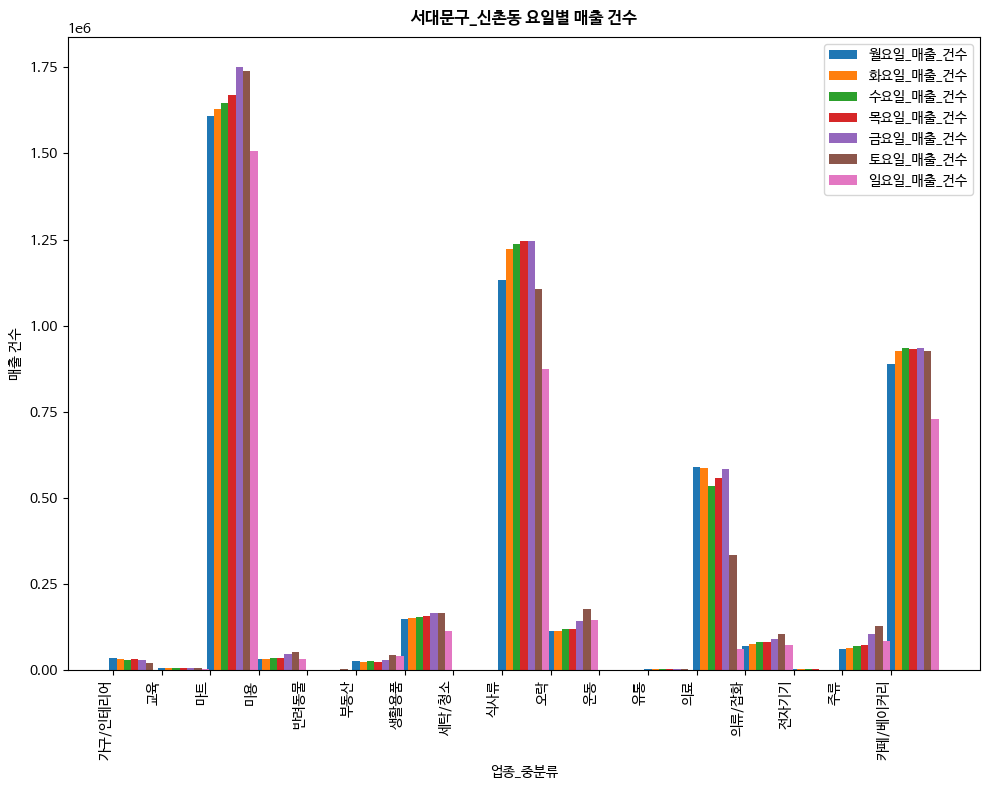

In [28]:
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_columns = ['중분류', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
                       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']

sinchon_sales_counts = sinchon.groupby('중분류')[sinchon_columns].sum().reset_index()
sinchon_sales_counts


### 그래프 그리기
# 그래프 데이터 준비
categories = sinchon_sales_counts['중분류']
counts = ['월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']
values = sinchon_sales_counts[counts].values.T

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))

x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(counts):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류')
ax.set_ylabel('매출 건수')
ax.set_title('서대문구_신촌동 요일별 매출 건수', pad=10, fontweight='bold')

# x축 이름, 표시 각도, 라벨 너비 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right')


# 범례 바깥으로
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# 범례
ax.legend()

# 결과 출력
plt.tight_layout()
plt.show()

#### 종합

==============================================중분류 매출건수==============================================


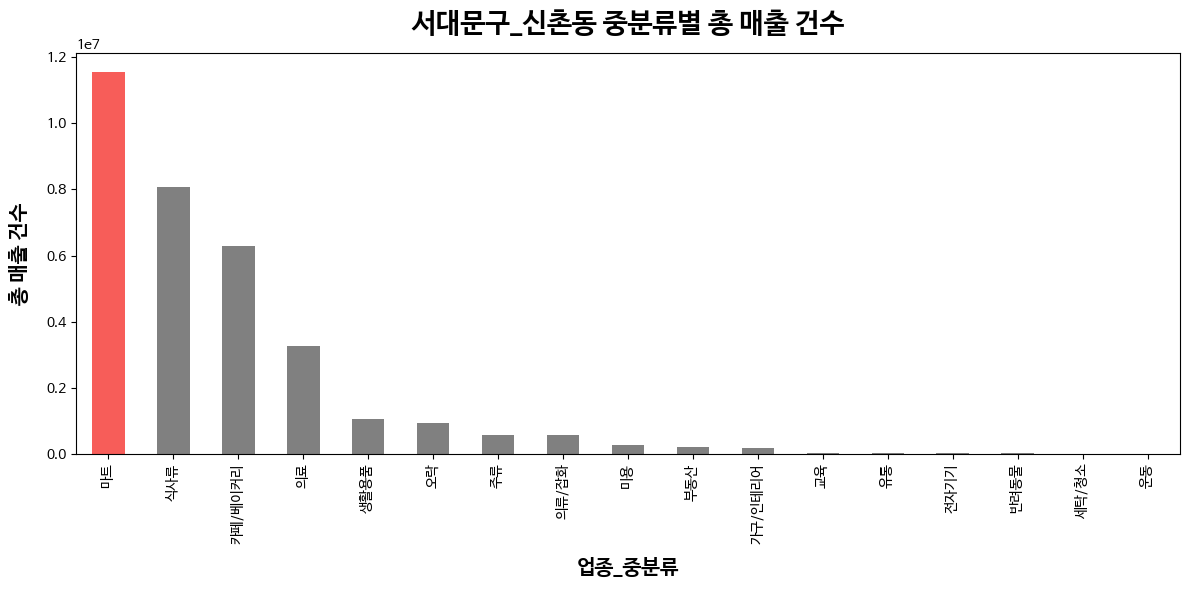

==============================================중분류 매출금액==============================================


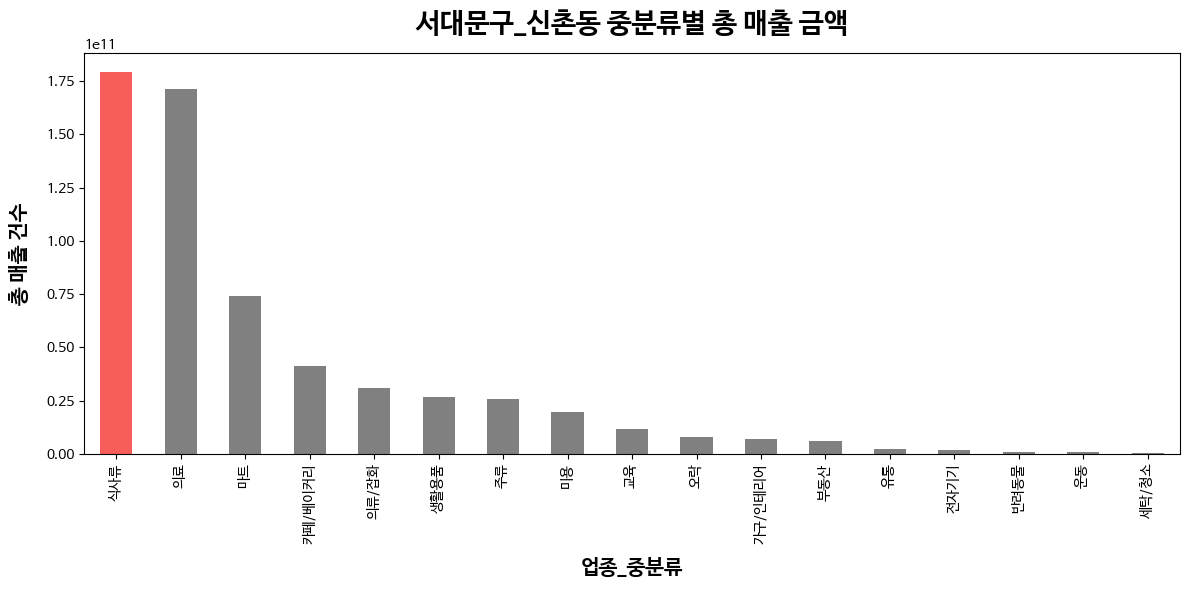

In [29]:
print("{0:=^100}".format("중분류 매출건수"))
# '중분류' 컬럼 값에 따른 '총_매출_건수' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('중분류')['총_매출_건수'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = ['grey'] * len(total_sales_by_category)
max_index = total_sales_by_category.idxmax()
bar_colors[total_sales_by_category.index.get_loc(max_index)] = '#f75d59'

total_sales_by_category.plot(kind='bar', color=bar_colors)

# # 숫자 값 표시
# for i, v in enumerate(total_sales_by_category):
#     ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=15, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=15, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류별 총 매출 건수', pad=15, fontsize=20, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()




print("{0:=^100}".format("중분류 매출금액"))




# '중분류' 컬럼 값에 따른 '총_매출_건수' 합산 후 내림차순 정렬
total_sales_by_category = sinchon.groupby('중분류')['총_매출_금액'].sum()
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = ['grey'] * len(total_sales_by_category)
max_index = total_sales_by_category.idxmax()
bar_colors[total_sales_by_category.index.get_loc(max_index)] = '#f75d59'

total_sales_by_category.plot(kind='bar', color=bar_colors)

# # 숫자 값 표시
# for i, v in enumerate(total_sales_by_category):
#     ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, color='#36454f')

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류', labelpad=10, fontsize=15, fontweight='bold')
ax.set_ylabel('총 매출 건수', labelpad=10, fontsize=15, fontweight='bold')
ax.set_title('서대문구_신촌동 중분류별 총 매출 금액', pad=15, fontsize=20, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()

### /8/ 업종별 해당 지역의 개업률 / 폐업률

<ipython-input-30-530870a27028>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_oc = sinchon.groupby('중분류')[sinchon_oc_columns].sum().reset_index()


================================================중분류=================================================


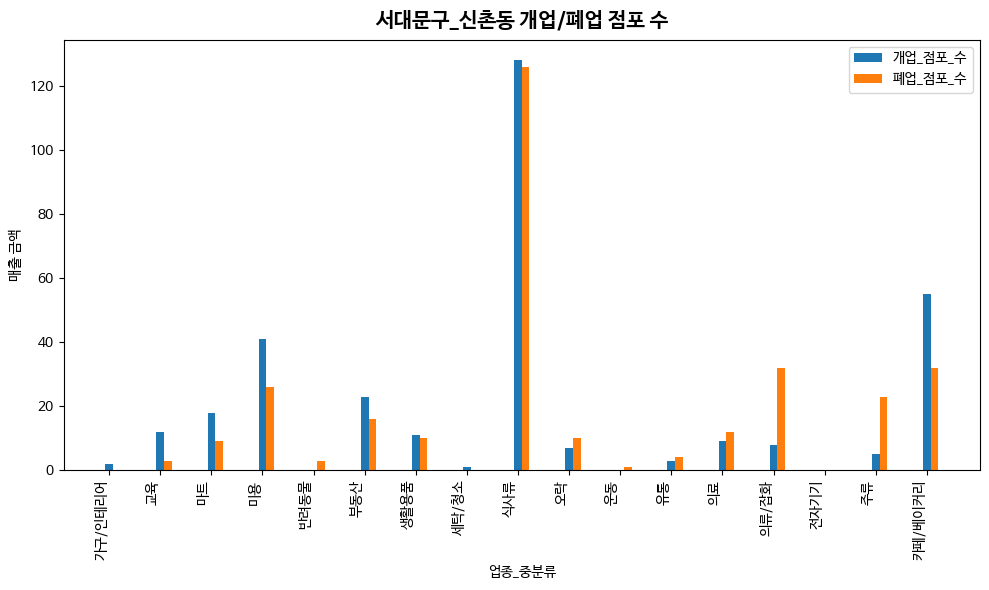

In [30]:
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_oc_columns = ['중분류', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수']

sinchon_oc = sinchon.groupby('중분류')[sinchon_oc_columns].sum().reset_index()




print("{0:=^100}".format("중분류"))
### 그래프 그리기
# 그래프 데이터 준비
categories = sinchon_oc['중분류']
counts = ['개업_점포_수','폐업_점포_수']
values = sinchon_oc[counts].values.T

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(counts):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류')
ax.set_ylabel('매출 금액')
ax.set_title('서대문구_신촌동 개업/폐업 점포 수', pad=10, fontsize=15, fontweight='bold')

# x축 이름, 표시 각도, 라벨 너비 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right')

# 범례
ax.legend()

# 결과 출력
plt.tight_layout()
plt.show()

### /9/ 업종별 연령별 매출 건수

<ipython-input-31-b2cbaa9f935f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinchon_age_sales = sinchon.groupby('중분류')[sinchon_age_columns].sum().reset_index()


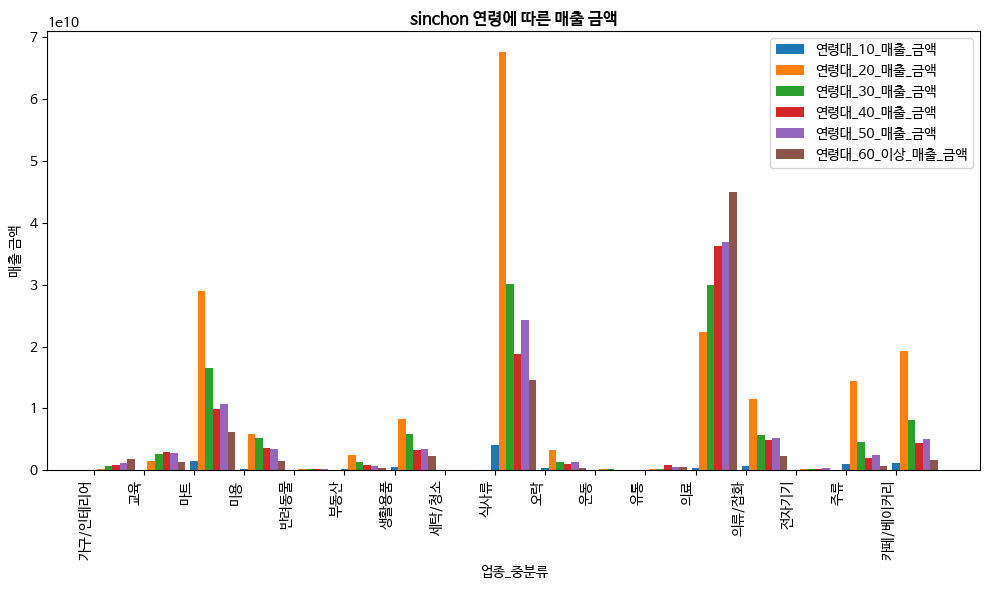

In [31]:
# 필요 컬럼으로 새롭게 데이터프레임 생성
sinchon_age_columns = ['중분류', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
                    '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

sinchon_age_sales = sinchon.groupby('중분류')[sinchon_age_columns].sum().reset_index()
sinchon_age_sales

### 그래프 그리기
# 그래프 데이터 준비
categories = sinchon_age_sales['중분류']
ages = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
values = sinchon_age_sales[ages].values.T

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))
width = 0.15

for i, day in enumerate(ages):
    ax.bar(x + i*width, values[i], width=width, label=day)

# x축, y축 레이블 및 제목 설정
ax.set_xlabel('업종_중분류')
ax.set_ylabel('매출 금액')
ax.set_title('sinchon 연령에 따른 매출 금액', fontweight='bold')

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right')

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


### /10/ 해당 행정동의 잘 나가는 업종별 상관관계 분석하기

In [32]:
# 점포수, 개폐업률, 프랜차이즈점포수, 매출금액 간 상관관계

columns = ['점포_수', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수',  '프랜차이즈_점포_수', '총_매출_금액', '총_매출_건수']

sinchon_new = sinchon[columns]
sinchon_corr = sinchon_new.corr(method='pearson')
sinchon_corr

,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,총_매출_건수
점포_수,1.000000,0.989701,0.624538,0.735874,0.589171,0.594649,0.353104
유사_업종_점포_수,0.989701,1.000000,0.658361,0.750623,0.698771,0.614854,0.437792
개업_점포_수,0.624538,0.658361,1.000000,0.494827,0.595179,0.372116,0.386027
폐업_점포_수,0.735874,0.750623,0.494827,1.000000,0.559580,0.475553,0.341906
프랜차이즈_점포_수,0.589171,0.698771,0.595179,0.559580,1.000000,0.498963,0.706577
총_매출_금액,0.594649,0.614854,0.372116,0.475553,0.498963,1.000000,0.633795
총_매출_건수,0.353104,0.437792,0.386027,0.341906,0.706577,0.633795,1.000000


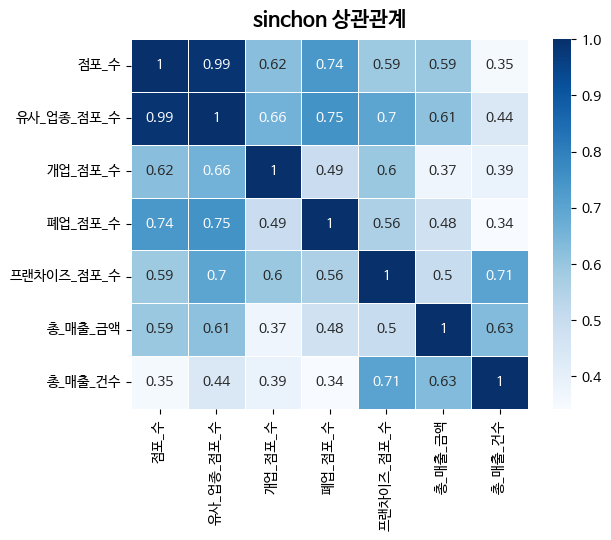

In [33]:
# 상관관계 히트맵 그리기
sns.heatmap(sinchon_new.corr(), annot=True,linewidths = 0.5, cmap='Blues')
plt.title('sinchon 상관관계', fontsize=15, fontweight='bold', pad=10)
plt.show()